In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join("..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis.visualization import (
    load_per_load_csvs,
    plot_tradeoff_per_load,
    plot_tradeoff_per_Qsat,
    plot_queue_and_steps_per_Qsat,
)

plt.rcParams.update(
    {
        "font.size": 14,  # default text size
        "axes.titlesize": 18,  # title
        "axes.labelsize": 16,  # x/y labels
        "xtick.labelsize": 12,  # x ticks
        "ytick.labelsize": 12,  # y ticks
        "legend.fontsize": 12,  # legend
    }
)

In [2]:
# Statistics for theoretical M/M/1 and M/G/1 models
times = []
for load in [1.4, 1.6, 1.8, 2.0]:
    df = pd.read_csv(
        f"/home/group-2/graph_gen_app_opt/outputs_simulation/optimized_model_70_steps_FCFS/arrivals_{load}.csv"
    )
    time = df["service_duration"].values.tolist()
    times.extend(time)

service_times = np.array(times)

S_bar = np.mean(service_times)

S2 = np.mean(service_times**2)

mu_mm1 = 1 / S_bar

print(f"Mean service time (S̄): {S_bar:.4f} s")
print(f"Second moment (E[S^2]): {S2:.4f} s^2")
print(f"M/M/1 service rate (μ): {mu_mm1:.4f} jobs/s")

Mean service time (S̄): 1.8147 s
Second moment (E[S^2]): 3.6793 s^2
M/M/1 service rate (μ): 0.5510 jobs/s


In [3]:
FCFS_FOLDER = "../outputs_simulation/optimized_model_70_steps_FCFS/"
FCFS_DYNAMIC_FOLDER = "../outputs_simulation/optimized_model_dynamic_steps_FCFS/"
RR_DYNAMIC_FOLDER = "../outputs_simulation/optimized_model_dynamic_steps_RR/"
FIXED_LOAD_FOLDER = (
    "../outputs_simulation/optimized_model_dynamic_steps_fixed_load_FCFS"
)
FIXED_LOAD_SMIN_FOLDER = (
    "../outputs_simulation/optimized_model_dynamic_steps_fixed_load_FCFS_Smin"
)
HIGH_QSAT = "../outputs_simulation/optimized_model_dynamic_steps_fixed_load_FCFS/arrivals_75.csv"
LOW_QSAT = "../outputs_simulation/optimized_model_dynamic_steps_fixed_load_FCFS/arrivals_30.csv"
MAE_PATH = "../csvs/Optimized_Hyperparameters_mae.csv"

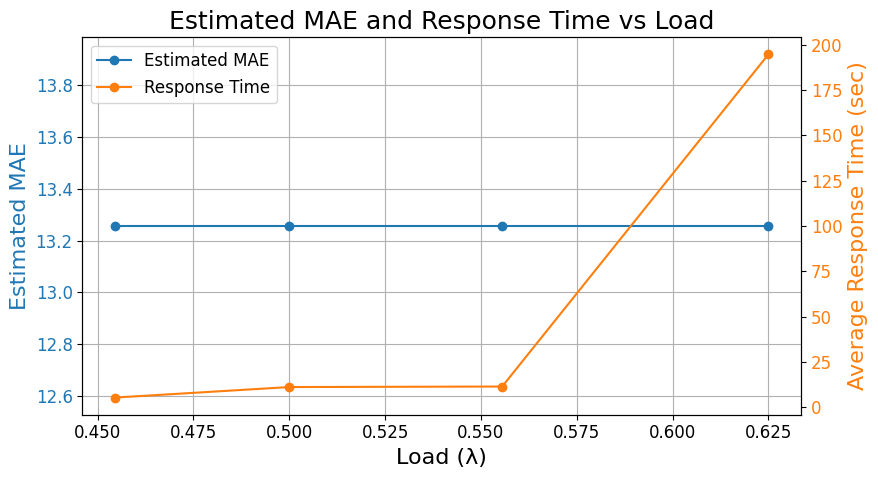

In [4]:
files = load_per_load_csvs(FCFS_FOLDER)
files = files[1:]
plot_tradeoff_per_load(
    files, MAE_PATH, output_path="../plots/mae_vs_response_time_no_dynamic.pdf"
)

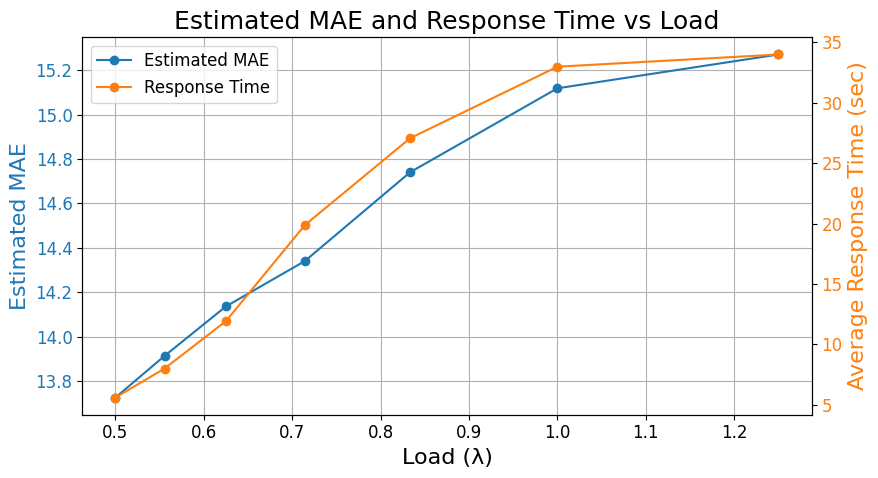

In [5]:
files = load_per_load_csvs(FCFS_DYNAMIC_FOLDER)
plot_tradeoff_per_load(
    files, MAE_PATH, output_path="../plots/mae_vs_response_time_dynamic.pdf"
)

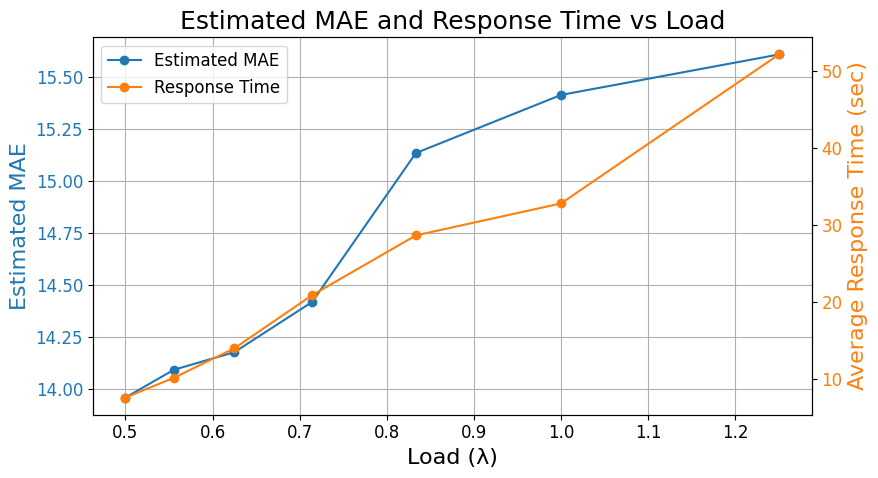

In [6]:
files = load_per_load_csvs(RR_DYNAMIC_FOLDER)
plot_tradeoff_per_load(
    files, MAE_PATH, output_path="../plots/mae_vs_response_time_dynamic_rr.pdf"
)

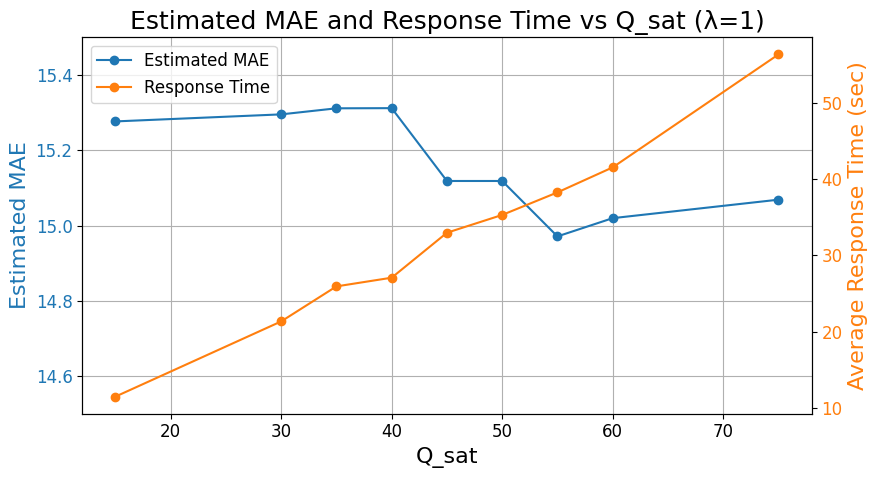

In [7]:
files = load_per_load_csvs(FIXED_LOAD_FOLDER)
plot_tradeoff_per_Qsat(files, MAE_PATH, output_path="../plots/fixed_load_tradeoff.pdf")

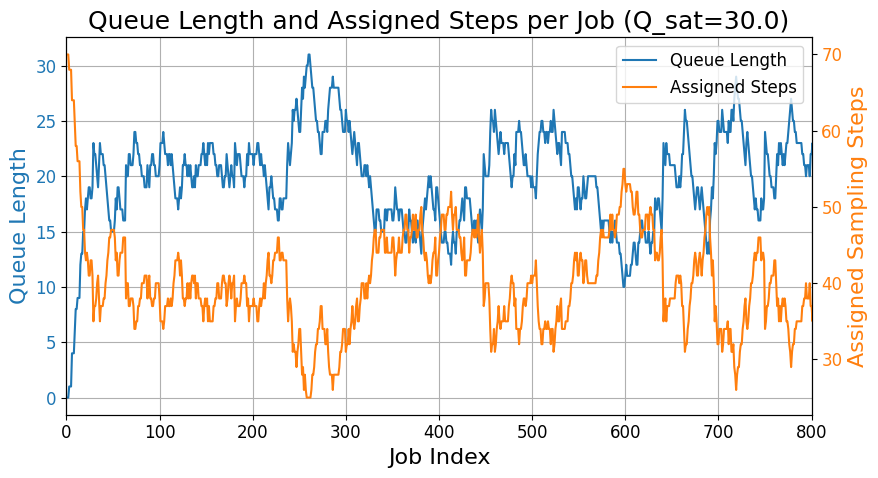

In [8]:
plot_queue_and_steps_per_Qsat(
    load_csv_file=LOW_QSAT,
    queue_col="num_in_queue",
    steps_col="sample_steps",
    output_path="../plots/small_Q_sat.pdf",
)

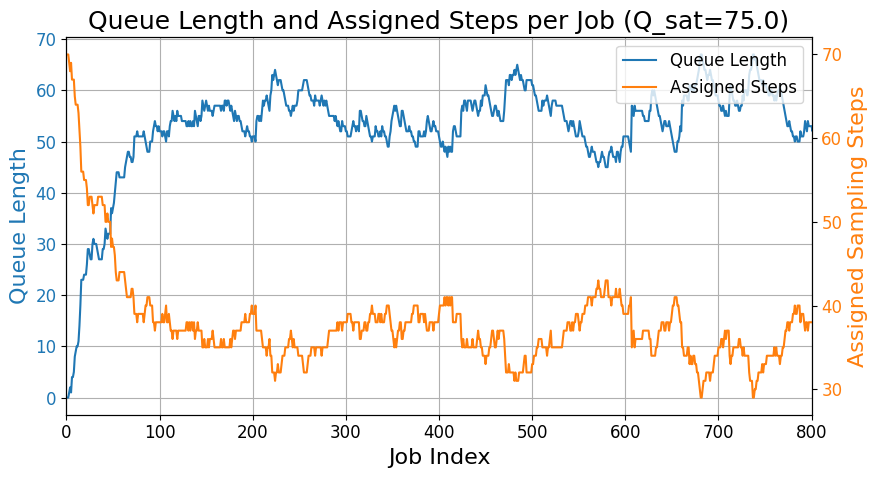

In [9]:
plot_queue_and_steps_per_Qsat(
    load_csv_file=HIGH_QSAT,
    queue_col="num_in_queue",
    steps_col="sample_steps",
    output_path="../plots/big_Q_sat.pdf",
)